In [13]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import uncertainties as unc
import uncertainties.unumpy as unp

In [14]:
def linear_fit(x, a, b):
    return a*x + b

def inverseLinearFit(y, a, b):
    return (y-b)/a

1.504+/-0.006


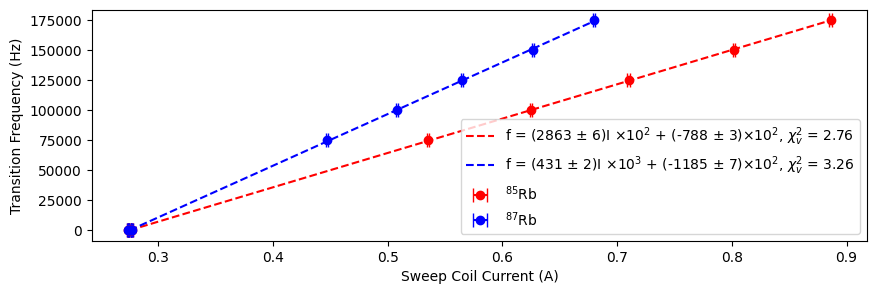

In [15]:
frequencies = np.array([0,0,0,0,0,75e3, 100e3, 125e3, 150e3, 175e3])
#uncs here should be 0.001
rb87 = np.array([0.274,0.275,0.276,0.277,0.275,0.447,0.508,0.565,0.627,0.680])
rb85 = np.array([0.274,0.275,0.276,0.277,0.275,0.535,0.625,0.710,0.802,0.886])
popt1, pcov1 = curve_fit(inverseLinearFit, frequencies, rb85, sigma = 0.001*np.ones(len(frequencies)))
popt2, pcov2 = curve_fit(inverseLinearFit, frequencies, rb87, sigma = 0.001*np.ones(len(frequencies)))
slope1 = unc.ufloat(popt1[0], np.sqrt(pcov1[0,0]))
slope2 = unc.ufloat(popt2[0], np.sqrt(pcov2[0,0]))

print(slope2/slope1)


plt.figure(figsize=(10,3))
plt.errorbar(rb85, frequencies, fmt = 'ro', xerr= 0.001, label=r'$^{85}$Rb', capsize = 5)
plt.errorbar(rb87, frequencies, fmt = 'bo', xerr= 0.001, label=r'$^{87}$Rb', capsize=5)

plt.xlabel('Sweep Coil Voltage (V)')
plt.ylabel('Transition Frequency (Hz)')

plt.legend()
plt.savefig('sweepFieldCalibration.svg', bbox_inches='tight')
plt.xlabel('Sweep Coil Current (A)')
Exp1 = np.floor(np.log10(np.sqrt(pcov1[0,0])))
Exp2 = np.floor(np.log10(np.sqrt(pcov2[0,0])))
M1 = popt1[0]/10**Exp1
M2 = popt2[0]/10**Exp2
MErr1 = np.sqrt(pcov1[0,0])/10**Exp1
MErr2 = np.sqrt(pcov2[0,0])/10**Exp2
BExp1 = np.floor(np.log10(np.sqrt(pcov1[1,1])))
BExp2 = np.floor(np.log10(np.sqrt(pcov2[1,1])))
B1 = popt1[1]/10**BExp1
B2 = popt2[1]/10**BExp2
BErr1 = np.sqrt(pcov1[1,1])/10**BExp1
BErr2 = np.sqrt(pcov2[1,1])/10**BExp2
chisquare1 = np.sum(np.pow((rb85 - inverseLinearFit(frequencies, *popt1))/.001, 2))/(len(rb85)-2)
chisquare2 = np.sum(np.pow((rb87 - inverseLinearFit(frequencies, *popt2))/.001, 2))/(len(rb87)-2)
label1 = rf"f = ({M1:.0f} $\pm$ {MErr1:.0f})I $\times10^{Exp1:.0f}$ + ({B1:.0f} $\pm$ {BErr1:.0f})$\times10^{BExp1:.0f}$, $\chi^2_v$ = {chisquare1:.2f}"
label2 = rf"f = ({M2:.0f} $\pm$ {MErr2:.0f})I $\times10^{Exp2:.0f}$ + ({B2:.0f} $\pm$ {BErr2:.0f})$\times10^{BExp2:.0f}$, $\chi^2_v$ = {chisquare2:.2f}"


plt.plot(inverseLinearFit(frequencies, *popt1), frequencies, 'r--', label=label1)
plt.plot(inverseLinearFit(frequencies, *popt2), frequencies, 'b--', label=label2)
plt.legend()
plt.savefig('sweepFieldCalibrationWithFit.svg', bbox_inches='tight')
plt.show()


B = (0.610 $\pm$ 0.003)I + (-0.166 $\pm$ 0.002), $\chi^2_v$ = 3.99


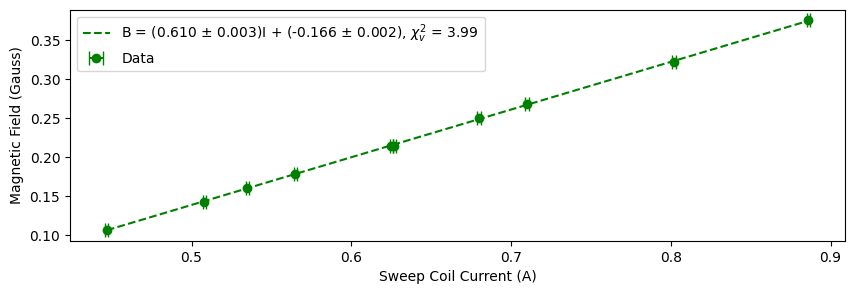

In [16]:
rb85Transitions = rb85[5:]
rb87Transitions = rb87[5:]
transitionFreqs = frequencies[5:]
B85 = transitionFreqs/1.3996e6*3
B87 = transitionFreqs/1.3996e6*2
BS = np.concatenate((B85, B87))
Is = np.concatenate((rb85Transitions, rb87Transitions))
sortedIs = np.sort(Is)
Is = unp.uarray(Is, 0.001*np.ones(len(Is)))
sortedIs = unp.uarray(sortedIs, 0.001*np.ones(len(sortedIs)))
popt3, pcov3 = curve_fit(inverseLinearFit, BS, unp.nominal_values(Is), sigma = unp.std_devs(Is))

chisquare = np.sum(np.pow((unp.nominal_values(Is) - inverseLinearFit(BS, *popt3))/.001, 2))/(len(Is)-2)
label = rf"B = ({popt3[0]:.3f} $\pm$ {np.sqrt(pcov3[0,0]):.3f})I + ({popt3[1]:.3f} $\pm$ {np.sqrt(pcov3[1,1]):.3f}), $\chi^2_v$ = {chisquare:.2f}"
print(label)


plt.figure(figsize=(10,3))
plt.plot(unp.nominal_values(sortedIs), unp.nominal_values(linear_fit(unp.nominal_values(sortedIs), *popt3)), 'g--', label=label)
plt.errorbar(unp.nominal_values(Is), unp.nominal_values(BS), xerr = unp.std_devs(Is), fmt = 'go', label='Data', capsize=5)
plt.xlabel('Sweep Coil Current (A)')
plt.ylabel('Magnetic Field (Gauss)')
plt.legend()
plt.savefig('sweepFieldBvsI.svg', bbox_inches='tight')
plt.show()

def sweepB(I):
    return unc.ufloat(popt3[0], np.sqrt(pcov3[0,0]))*I + unc.ufloat(popt3[1], np.sqrt(pcov3[1,1]))



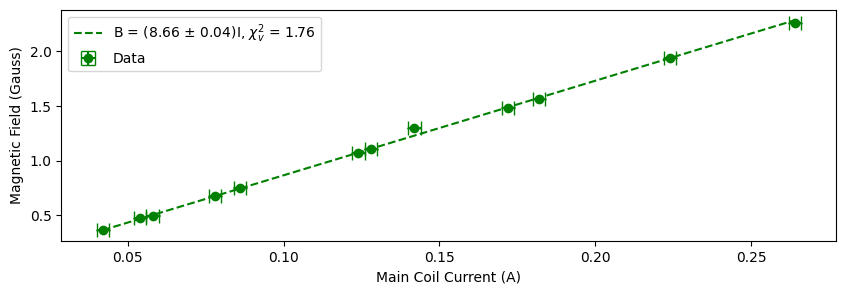

In [17]:
def slopeFit(x, a):
    return a*x
frequencies = np.array([1e6, 850e3, 650e3, 450e3, 250e3, 150e3])
zeroFieldSweep = np.array([0.019, 0.065, 0.021, 0.029,0.040, 0.019])
zeroFieldMain = np.array([0.008, 0.007, 0.008, 0.008, 0.008, 0.009])*2
firstPeakSweep = np.array([0.054, 0.135,0.043, 0.094, 0.044, 0.026 ])
firstPeakMain = np.array([0.091, 0.071, 0.062, 0.043, 0.029, 0.021])*2
secondPeakSweep = np.array([0.081, 0.083, 0.121, 0.042, 0.040, 0.020])
secondPeakMain = np.array([0.132, 0.112, 0.086, 0.064, 0.039, 0.027])*2
B85MainCal = frequencies/1.3996e6*3
B87MainCal = frequencies/1.3996e6*2
firstPeakMainB = B87MainCal - sweepB(firstPeakSweep)
secondPeakMainB = B85MainCal - sweepB(secondPeakSweep)
mainFieldBs = np.concatenate((firstPeakMainB, secondPeakMainB))
mainFieldIs = np.concatenate((firstPeakMain, secondPeakMain))
mainFieldIs = unp.uarray(mainFieldIs, 0.002*np.ones(len(mainFieldIs)))
sortedIs = unp.nominal_values(np.sort(mainFieldIs))
popt4, pcov4 = curve_fit(slopeFit, unp.nominal_values(mainFieldIs), unp.nominal_values(mainFieldBs), sigma = unp.std_devs(mainFieldBs))
chisquare = np.sum(np.pow((unp.nominal_values(mainFieldIs) - unp.nominal_values(mainFieldBs)/popt4[0])/(0.002), 2))/(len(mainFieldBs)-1)

label = rf"B = ({popt4[0]:.2f} $\pm$ {np.sqrt(pcov4[0,0]):.2f})I, $\chi^2_v$ = {chisquare:.2f}"
plt.figure(figsize=(10,3))
plt.plot(sortedIs, slopeFit(sortedIs, *popt4), 'g--', label=label)
plt.errorbar(unp.nominal_values(mainFieldIs), unp.nominal_values(mainFieldBs),xerr = unp.std_devs(mainFieldIs), yerr = unp.std_devs(mainFieldBs), fmt = 'go', label='Data',capsize=5)
plt.legend()
plt.xlabel('Main Coil Current (A)')
plt.ylabel('Magnetic Field (Gauss)')
plt.savefig('mainFieldBvsI.svg', bbox_inches='tight')
plt.show()

def BField(mainCoilCurrent, sweepCoilCurrent):
    return sweepB(sweepCoilCurrent) + unc.ufloat(popt4[0], np.sqrt(pcov4[0,0]))*mainCoilCurrent


In [18]:
fiveMegVoltage = 2.5e6/1.3996e6*3/popt4[0]/2
print(fiveMegVoltage)

0.3095290607536128


In [19]:
#omega I +1/2 solution
def quadraticResField87(omega, g_f, muIScaler):
    J = 1/2
    I =3/2
    F = 2
    out = []
    for mBar in [-2.5, 1.5]:
        mu_N = 5.0507837393e-31
        mu_I= muIScaler*mu_N
        g_j =g_f*(2*F*(F+1))/(F*(F+1) - I*(I+1) + J*(J+1))
        mu_b = 9.274e-28
        hbar = 1.0545718e-34
        a = -2*mBar*((g_j*mu_b + mu_I/I)**2)/(((2*I + 1)**2)*hbar**2*6834.7e6*2*np.pi)
        b = (g_j*mu_b - 2*mu_I)/((2*I + 1)*hbar)
        c = -omega
        b2 = (g_j*mu_b - 2*mu_I*(1+1/I))/((2*I + 1)*hbar)
        out.append((-b + np.sqrt(b**2 - 4*a*c))/(2*a))
        out.append((-b2 + np.sqrt(b2**2 - 4*a*c))/(2*a))
        print((-b - np.sqrt(b**2 - 4*a*c))/(2*a))
        print((-b2 - np.sqrt(b2**2 - 4*a*c))/(2*a))
    return np.array(out)

def quadraticResField85(omega, g_f, muIScaler):
    J = 1/2
    I =5/2
    F = 3
    out = []
    for mBar in [-2.5, 1.5, 2.5]:
        mu_N = 5.0507837393e-31
        mu_I= muIScaler*mu_N
        g_j =g_f*(2*F*(F+1))/(F*(F+1) - I*(I+1) + J*(J+1))
        mu_b = 9.274e-28
        hbar = 1.0545718e-34
        a = -2*mBar*((g_j*mu_b + mu_I/I)**2)/(((2*I + 1)**2)*hbar**2*6834.7e6*2*np.pi)
        b = (g_j*mu_b - 2*mu_I)/((2*I + 1)*hbar)
        c = -omega
        b2 = (g_j*mu_b - 2*mu_I*(1+1/I))/((2*I + 1)*hbar)
        out.append((-b + np.sqrt(b**2 - 4*a*c))/(2*a))
        out.append((-b2 + np.sqrt(b2**2 - 4*a*c))/(2*a))
    return np.array(out)


-1955.553154225925
-1953.6109602944164
3240.2015571320794
3236.9455407367877
-1955.574679803539
-1953.6325071156448
3240.179777449077
3236.9237390481503
-1955.596204909013
-1953.654053463334
3240.157997472624
3236.9019370651727
-1955.617729542379
-1953.6755993375164
3240.1362172027093
3236.8801347878407
-1955.639253703667
-1953.6971447382218
3240.11443663932
3236.8583322161458
-1955.6607773929084
-1953.7186896654814
3240.092655782444
3236.8365293500733
-1955.6823006101347
-1953.740234119328
3240.0708746320706
3236.814726189612
-1955.7038233553765
-1953.7617780997907
3240.0490931881864
3236.7929227347495
-1955.7253456286649
-1953.7833216069025
3240.027311450781
3236.7711189854745
-1955.746867430031
-1953.8048646406937
3240.005529419842
3236.749314941775
-1955.7683887595058
-1953.826407201196
3239.983747095357
3236.727510603641
-1955.7899096171207
-1953.8479492884398
3239.961964477315
3236.705705971056
-1955.811430002906
-1953.8694909024566
3239.940181565704
3236.683901044012
-1955.83294

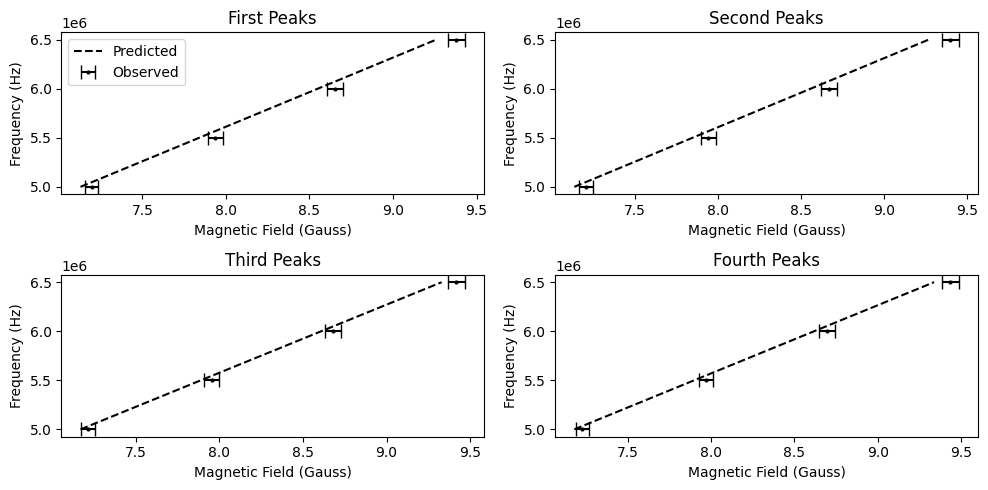

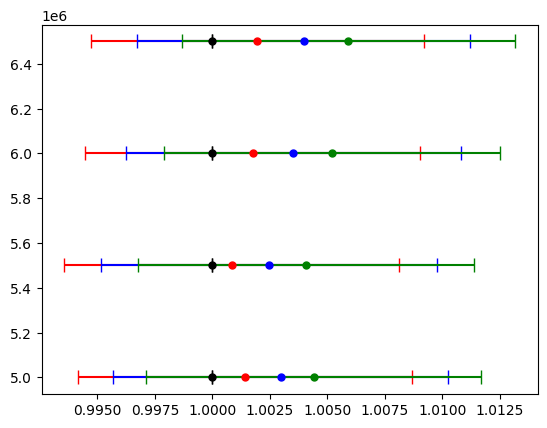

In [20]:
frequencies = np.array([5e6, 5.5e6, 6e6, 6.5e6])
mainCoilCurrents = np.array([0.410, 0.454, 0.495, 0.533])*2
mainCoilCurrents = unp.uarray(mainCoilCurrents, 0.002*np.ones(len(mainCoilCurrents)))
firstPeaks = np.array([0.433, 0.398, 0.407, 0.522])
firstPeaks = unp.uarray(firstPeaks, 0.001*np.ones(len(firstPeaks)))
secondPeaks = np.array([0.45, 0.409, 0.432, 0.552])
secondPeaks = unp.uarray(secondPeaks, 0.001*np.ones(len(secondPeaks)))
thridPeaks = np.array([0.468, 0.430, 0.457, 0.583])
thridPeaks = unp.uarray(thridPeaks, 0.001*np.ones(len(thridPeaks)))
fourthPeaks = np.array([0.485, 0.451, 0.481, 0.613])
fourthPeaks = unp.uarray(fourthPeaks, 0.001*np.ones(len(fourthPeaks)))
firstPeakBs = BField(mainCoilCurrents, firstPeaks)

secondPeakBs = BField(mainCoilCurrents, secondPeaks)
thirdPeakBs = BField(mainCoilCurrents, thridPeaks)
fourthPeakBs = BField(mainCoilCurrents, fourthPeaks)
predictedFirstPeaks = []
predictedSecondPeaks = []
predictedThirdPeaks = []
predictedFourthPeaks = []
plotFreqs = np.linspace(5e6, 6.5e6, 100)
for freq in plotFreqs:
    resonances = quadraticResField87(freq*2*np.pi, 1/2, 2.75131)
    predictedFirstPeaks.append(resonances[0])
    predictedSecondPeaks.append(resonances[1])
    predictedThirdPeaks.append(resonances[2])
    predictedFourthPeaks.append(resonances[3])

print(firstPeakBs)
print(secondPeakBs)
print(thirdPeakBs)
print(fourthPeakBs)
for freq in frequencies:
    resonances = quadraticResField87(freq*2*np.pi, 1/2, 2.75131)
    print(resonances)


#make a 2by 2 subplot
fig, ax = plt.subplots(2,2, figsize=(10,5))
ax[0,0].set_title("First Peaks")
ax[0,0].errorbar(unp.nominal_values(firstPeakBs), frequencies, xerr = unp.std_devs(firstPeakBs), fmt ="ko", label='Observed', markersize=2, capsize=5)
ax[0,0].plot(predictedFirstPeaks, plotFreqs, "k--", label='Predicted', markersize=2)
ax[0,0].set_xlabel('Magnetic Field (Gauss)')
ax[0,0].set_ylabel('Frequency (Hz)')
ax[0,0].legend()
ax[0,1].set_title("Second Peaks")
ax[0,1].errorbar(unp.nominal_values(secondPeakBs), frequencies, xerr = unp.std_devs(secondPeakBs), fmt ="ko", label='Observed', markersize=2, capsize=5)
ax[0,1].plot(predictedSecondPeaks, plotFreqs, "k--", label='Predicted', markersize=2)
ax[0,1].set_xlabel('Magnetic Field (Gauss)')
ax[0,1].set_ylabel('Frequency (Hz)')
ax[1,0].set_title("Third Peaks")
ax[1,0].errorbar(unp.nominal_values(thirdPeakBs), frequencies, xerr = unp.std_devs(thirdPeakBs), fmt ="ko", label='ThirdPeak', markersize=2, capsize=5)
ax[1,0].plot(predictedThirdPeaks, plotFreqs, "k--", label='ThirdPeakPredicted', markersize=2)
ax[1,0].set_xlabel('Magnetic Field (Gauss)')
ax[1,0].set_ylabel('Frequency (Hz)')
ax[1,1].set_title("Fourth Peaks")
ax[1,1].errorbar(unp.nominal_values(fourthPeakBs), frequencies, xerr = unp.std_devs(fourthPeakBs), fmt ="ko", label='FourthPeak', markersize=2, capsize=5)
ax[1,1].plot(predictedFourthPeaks, plotFreqs, "k--", label='FourthPeakPredicted', markersize=2)
ax[1,1].set_xlabel('Magnetic Field (Gauss)')
ax[1,1].set_ylabel('Frequency (Hz)')
plt.tight_layout()
plt.savefig("quadraticRb87.svg", bbox_inches='tight')
plt.show()

#plotting the spreads of the peaks
secondPeakBs = secondPeakBs/firstPeakBs
thirdPeakBs = thirdPeakBs/firstPeakBs
fourthPeakBs = fourthPeakBs/firstPeakBs
firstPeakBs = firstPeakBs/firstPeakBs
plt.errorbar(unp.nominal_values(firstPeakBs), frequencies, xerr = unp.std_devs(firstPeakBs), fmt ="ko", label='FirstPeak', markersize=5, capsize=5)
plt.errorbar(unp.nominal_values(secondPeakBs), frequencies, xerr = unp.std_devs(secondPeakBs), fmt ="ro", label='SecondPeak', markersize=5, capsize=5)
plt.errorbar(unp.nominal_values(thirdPeakBs), frequencies, xerr = unp.std_devs(thirdPeakBs), fmt ="bo", label='ThirdPeak', markersize=5, capsize=5)
plt.errorbar(unp.nominal_values(fourthPeakBs), frequencies, xerr = unp.std_devs(fourthPeakBs), fmt ="go", label='FourthPeak', markersize=5, capsize=5)
plt.show()



[5.373769612174347+/-0.03288615671375461
 6.44568929391078+/-0.0376490257337695
 7.520275198046329+/-0.042666418989284485
 8.612558500400887+/-0.04780918227441005]
[5.38170292861735+/-0.03288719242192014
 6.457894396130785+/-0.03765055888593627
 7.537362341154336+/-0.04266834850130954
 8.634527684396895+/-0.0478116339055215]
[5.390856755282353+/-0.0328884450188937
 6.47132000857279+/-0.03765235594826452
 7.554449484262342+/-0.04267044363948063
 8.657107123503902+/-0.047814408251014844]
[5.400010581947357+/-0.03288975926886402
 6.483525110792794+/-0.03765409016862644
 7.571536627370349+/-0.0426727043794021
 8.67907630749991+/-0.0478173553039258]
[5.40855415350136+/-0.032885379745313296
 6.496340468123799+/-0.03765106888955475
 7.589234025589355+/-0.042670856867564624
 8.70226600171792+/-0.04781683707792056]
[5.417707980166363+/-0.032886813416593975
 6.509155825454804+/-0.03765309863553306
 7.606931423808361+/-0.0426735507564387
 8.724845440824927+/-0.04782038573139575]
[5.3527482  5.354

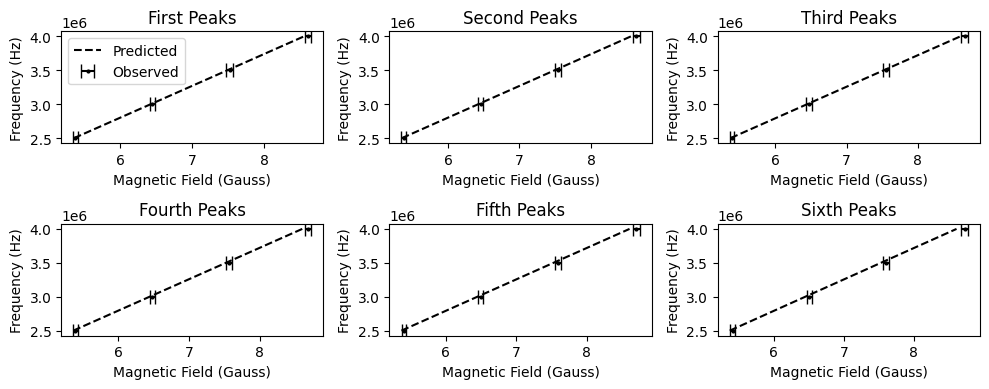

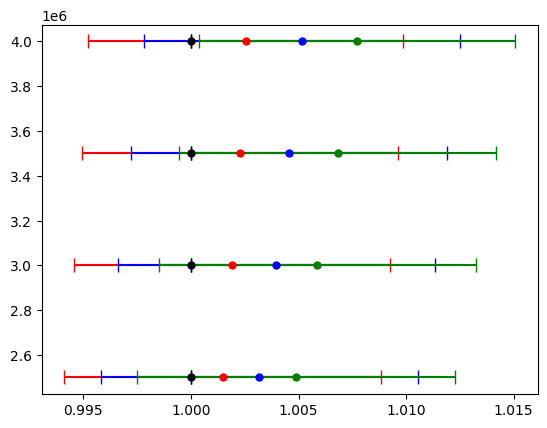

In [21]:
frequencies = np.array([2.5e6, 3e6, 3.5e6, 4e6])
mainFieldIs = np.array([0.310, 0.371, 0.433, 0.495])*2
mainFieldIs = unp.uarray(mainFieldIs, 0.002*np.ones(len(mainFieldIs)))
firstPeakIs = np.array([0.284, 0.310, 0.312, 0.343])
firstPeakIs = unp.uarray(firstPeakIs, 0.001*np.ones(len(firstPeakIs)))
secondPeakIs = np.array([0.297, 0.330, 0.340, 0.379])
secondPeakIs = unp.uarray(secondPeakIs, 0.001*np.ones(len(secondPeakIs)))
thirdPeakIs = np.array([0.312, 0.352, 0.368, 0.416])
thirdPeakIs = unp.uarray(thirdPeakIs, 0.001*np.ones(len(thirdPeakIs)))
fourthPeakIs = np.array([0.327, 0.372, 0.396, 0.452])
fourthPeakIs = unp.uarray(fourthPeakIs, 0.001*np.ones(len(fourthPeakIs)))
fifthPeakIs = np.array([0.341, 0.393, 0.425, 0.490])
sixthPeakIs = np.array([0.356, 0.414, 0.454, 0.527])
firstPeakBs = BField(mainFieldIs, firstPeakIs)
secondPeakBs = BField(mainFieldIs, secondPeakIs)
thirdPeakBs = BField(mainFieldIs, thirdPeakIs)
fourthPeakBs = BField(mainFieldIs, fourthPeakIs)
fifthPeakBs = BField(mainFieldIs, fifthPeakIs)
sixthPeakBs = BField(mainFieldIs, sixthPeakIs)
plotFreqs = np.linspace(2.5e6, 4e6, 100)
predictedFirstPeaks = []
predictedSecondPeaks = []
predictedThirdPeaks = []
predictedFourthPeaks = []
predictedFifthPeaks = []
predictedSixthPeaks = []
for freq in plotFreqs:
    resonances = quadraticResField85(freq*2*np.pi, 1/3, 1.35298)
    predictedFirstPeaks.append(resonances[0])
    predictedSecondPeaks.append(resonances[1])
    predictedThirdPeaks.append(resonances[2])
    predictedFourthPeaks.append(resonances[3])
    predictedFifthPeaks.append(resonances[4])
    predictedSixthPeaks.append(resonances[5])
print(firstPeakBs)
print(secondPeakBs)
print(thirdPeakBs)
print(fourthPeakBs)
print(fifthPeakBs)
print(sixthPeakBs)
for freq in frequencies:
    resonances = quadraticResField85(freq*2*np.pi, 1/3, 1.35298)
    print(resonances)


fig, ax = plt.subplots(2,3, figsize=(10,4))
ax[0,0].set_title("First Peaks")
ax[0,0].errorbar(unp.nominal_values(firstPeakBs), frequencies, xerr = unp.std_devs(firstPeakBs), fmt ="ko", label='Observed', markersize=2, capsize=5)
ax[0,0].plot(predictedFirstPeaks, plotFreqs, "k--", label='Predicted', markersize=2)
ax[0,0].set_xlabel('Magnetic Field (Gauss)')
ax[0,0].set_ylabel('Frequency (Hz)')
ax[0,0].legend()
ax[0,1].set_title("Second Peaks")
ax[0,1].errorbar(unp.nominal_values(secondPeakBs), frequencies, xerr = unp.std_devs(secondPeakBs), fmt ="ko", label='Observed', markersize=2, capsize=5)
ax[0,1].plot(predictedSecondPeaks, plotFreqs, "k--", label='Predicted', markersize=2)
ax[0,1].set_xlabel('Magnetic Field (Gauss)')
ax[0,1].set_ylabel('Frequency (Hz)')
ax[0,2].set_title("Third Peaks")
ax[0,2].errorbar(unp.nominal_values(thirdPeakBs), frequencies, xerr = unp.std_devs(thirdPeakBs), fmt ="ko", label='ThirdPeak', markersize=2, capsize=5)
ax[0,2].plot(predictedThirdPeaks, plotFreqs, "k--", label='ThirdPeakPredicted', markersize=2)
ax[0,2].set_xlabel('Magnetic Field (Gauss)')
ax[0,2].set_ylabel('Frequency (Hz)')
ax[1,0].set_title("Fourth Peaks")
ax[1,0].errorbar(unp.nominal_values(fourthPeakBs), frequencies, xerr = unp.std_devs(fourthPeakBs), fmt ="ko", label='FourthPeak', markersize=2, capsize=5)
ax[1,0].plot(predictedFourthPeaks, plotFreqs, "k--", label='FourthPeakPredicted', markersize=2)
ax[1,0].set_xlabel('Magnetic Field (Gauss)')
ax[1,0].set_ylabel('Frequency (Hz)')
ax[1,1].set_title("Fifth Peaks")
ax[1,1].errorbar(unp.nominal_values(fifthPeakBs), frequencies, xerr = unp.std_devs(fifthPeakBs), fmt ="ko", label='FifthPeak', markersize=2, capsize=5)
ax[1,1].plot(predictedFifthPeaks, plotFreqs, "k--", label='FifthPeakPredicted', markersize=2)
ax[1,1].set_xlabel('Magnetic Field (Gauss)')
ax[1,1].set_ylabel('Frequency (Hz)')
ax[1,2].set_title("Sixth Peaks")
ax[1,2].errorbar(unp.nominal_values(sixthPeakBs), frequencies, xerr = unp.std_devs(sixthPeakBs), fmt ="ko", label='SixthPeak', markersize=2, capsize=5)
ax[1,2].plot(predictedSixthPeaks, plotFreqs, "k--", label='SixthPeakPredicted', markersize=2)
ax[1,2].set_xlabel('Magnetic Field (Gauss)')
ax[1,2].set_ylabel('Frequency (Hz)')
plt.tight_layout()
plt.savefig("quadraticRb85exec.svg", bbox_inches='tight')
plt.show()

secondPeakBs = secondPeakBs/firstPeakBs
thirdPeakBs = thirdPeakBs/firstPeakBs
fourthPeakBs = fourthPeakBs/firstPeakBs
firstPeakBs = firstPeakBs/firstPeakBs
plt.errorbar(unp.nominal_values(firstPeakBs), frequencies, xerr = unp.std_devs(firstPeakBs), fmt ="ko", label='FirstPeak', markersize=5, capsize=5)
plt.errorbar(unp.nominal_values(secondPeakBs), frequencies, xerr = unp.std_devs(secondPeakBs), fmt ="ro", label='SecondPeak', markersize=5, capsize=5)
plt.errorbar(unp.nominal_values(thirdPeakBs), frequencies, xerr = unp.std_devs(thirdPeakBs), fmt ="bo", label='ThirdPeak', markersize=5, capsize=5)
plt.errorbar(unp.nominal_values(fourthPeakBs), frequencies, xerr = unp.std_devs(fourthPeakBs), fmt ="go", label='FourthPeak', markersize=5, capsize=5)
plt.show()



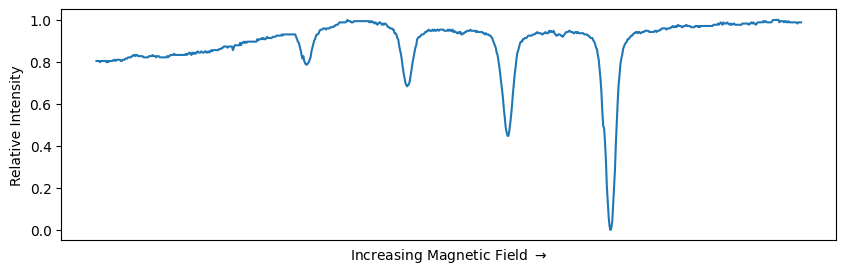

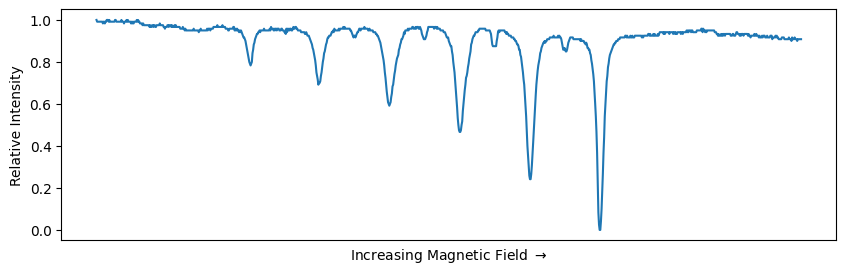

In [22]:
import pandas as pd

sweep1 = pd.read_csv("rb87Sweep.CSV")["PDVoltage"]
sweep1 = sweep1[sweep1> 0.33]
sweep1 = sweep1[len(sweep1)//2:]
sweep1 = sweep1 - np.min(sweep1)
sweep1 = sweep1/np.max(sweep1)
sweep2 = pd.read_csv("rb85Sweep.CSV")["PDVoltage"]
sweep2 = sweep2[sweep2> -5]
sweep2 = sweep2[sweep2 < 8]
sweep2 = sweep2 - np.min(sweep2)
sweep2 = sweep2/np.max(sweep2)

plt.figure(figsize=(10,3))
plt.plot(np.linspace(0,1,len(sweep1)), sweep1, label='Rb87')
plt.xlabel(r"Increasing Magnetic Field $\rightarrow$")
plt.ylabel("Relative Intensity")
plt.xticks([])
plt.savefig("rb87sweep.svg", bbox_inches='tight')
plt.show()
plt.figure(figsize=(10,3))
plt.plot(np.linspace(0,1,len(sweep2)), sweep2, label='Rb85')
plt.xlabel(r"Increasing Magnetic Field $\rightarrow$")
plt.ylabel("Relative Intensity")
plt.xticks([])
plt.savefig("rb85sweep.svg", bbox_inches='tight')
plt.show()
